In [65]:
import boto3
import pandas as pd
from collections import Counter
import re


import io
import string
import requests

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [64]:
raw = pd.read_csv("IndiaNGO.txt", names=['Column Names', 'Data'])
raw = raw.drop(labels=0, axis=0)
raw


,Column Names,Data
1,NGO Name,Smile Foundation Sikkim
2,Unique Id of VO/NGO,SK/2018/0220160
3,President,Sumitra Subba
4,Secretary,Reema Subba
5,Treasurer,Khimoo Lepcha
...,...,...
1889050,Email,[email protected]
1889051,Website,NO website is listed
1889052,Key Issues,This LOKKALYANS AMITIBISAL PUR NGO charity is ...
1889053,Operational States,Uttar Pradesh


About this dataset <br>
Data provided by: IndiaNGO <br>
Source: s3://daanmatchdatafiles/webscrape-fall2021/IndiaNGO.csv <br>
Type: csv <br>
Last November 8, 2021, 15:22:08 (UTC-08:00) <br>
Size: 68.8 MB

In [12]:
# Strip Leading and trailing whitespace
raw["Column Names"] = raw["Column Names"].apply(lambda x: x.strip())
raw["Data"] = raw["Data"].apply(lambda x: x.strip())

In [13]:
# List of all the headers
headers = raw["Column Names"].unique()
headers

array(['NGO Name', 'Unique Id of VO/NGO', 'President', 'Secretary',
       'Treasurer', 'Registered With', 'Type of NGO',
       'Registration Number', 'City of Registration',
       'State of Registration', 'Date of Registration', 'frca', 'City',
       'State', 'Country', 'Telephone', 'Mobile Number', 'Address',
       'Email', 'Website', 'Key Issues', 'Operational States',
       'Operational Districts', 'Chief Functionary', 'Chairman',
       'Joint Secretary', 'Others', 'Actor',
       'NGO Registration certificate', 'Telephone 2', 'Member',
       'Vice Chairman', 'Trustee', 'Board Member', 'Promoter 1',
       'Promoter 2', 'Vice President', 'Social Worker', 'Director',
       'Accountant', 'Project Head', 'Assistant Manager',
       'Executive Member', 'Assistant Secretary', 'Patron',
       'Asisstant Secretary', 'Programe Manager',
       'Chief Functionary and Director', 'Supretendent',
       'Project Officer', 'Finance Secretary', 'Principal', 'Manager',
       'General Se

In [15]:
# Groupby the headers and convert to dictionary
raw_dict = raw.groupby("Column Names")["Data"].apply(list).to_dict()
raw_dict

{'': ['KERALAKERALA->Idukki', 'KERALAKERALA->Kannur'],
 'APO': ['PARWAT AHIRWAR',
  'Naresh Yadav',
  'Praveen Bhatnagar',
  'Padma Charan Sethi'],
 'Academic Administrator': ['PRADIP BASAVANTRAO DESHMUKH',
  'CHAMSHEL PASHEL',
  'KALEESWARAN',
  'MOHAMED MOHIDEEN ABDUL KARIM',
  'NISHA N',
  'M SURAJ KUMAR DHOKA',
  'ASHOK KUMAR MOOTHA',
  'RAJENDRA KUMAR ANCHALIYA',
  'MANAK CHAND DOSI',
  'MAHADEV ANNASAHEB CHOUGALE',
  'Rajitha V',
  'Sharmila Bafna',
  'ALAVIKUTTY',
  'Dhanish V S',
  'Latha Satheeshkumar',
  'AKRITI JAIN',
  'Pushpa Agarwal',
  'GOLDI SWARNKAR',
  'Arbaj Hussain Mizwani',
  'Vikash Kurmi',
  'Nirmala Gadi',
  'Anupma Kujur',
  'MAHENDRA BHAGAT',
  'Shaitan Singh Meena',
  'KHUSHBOO THAKUR',
  'Siddhant Karmveer',
  'Anna Selva Rita George',
  'Amol Chandrabhan Goje',
  'SUCHETA NARENDRA KETKAR',
  'ANUSHREE SANJAY LOKUR',
  'RAINA HITESH CHAMPAWAT',
  'Bhima Sitaram Tupsamundre',
  'Prakash Bapurao Jalhare',
  'Vishwanath Dattatraya Gokhale',
  'Sagar Chandel',
 

In [16]:
# Convert dictionary to dataframe, and expand list
raw_final = pd.DataFrame.from_dict(raw_dict,orient='index').transpose()
raw_final.head()

,,APO,Academic Administrator,Academic Adviser,Accountant,Actor,Actress,Additional Director,Additional Secretary,Additional Treasurer,...,Telephone,Telephone 2,Treasurer,Trustee,Type of NGO,Unique Id of VO/NGO,Vice Chairman,Vice President,Website,frca
0,KERALAKERALA->Idukki,PARWAT AHIRWAR,PRADIP BASAVANTRAO DESHMUKH,PREMA SISTER D S S,Dharmendra Goud,jitendra asshok shirsate,SINGAMSETTY SHARADAMMA,NEELENDRA PRATAP SINGH,MOHAMMAD SARIK,SENTHIVEL S,...,Not Available,9832557651,Khimoo Lepcha,Vijayalakshmi R,Registered Societies (Non-Government),SK/2018/0220160,Devaki R,PRAVIN DESAI,Not Available,Not Available
1,KERALAKERALA->Kannur,Naresh Yadav,CHAMSHEL PASHEL,CHELUVARAJU HAMSAVENI,VINITHA T S,KOLATA NARASIMHA REDDY,Bharti Mazumdar,SUHAIL MOHAMED YACOOB KHANDWANI,Vinita satalkar,KHOMKUNGA CHONGOM,...,01651-257487,09947421050,Amarjeet Singh,M Vasu,Trust (Non-Government),PB/2016/0108881,PRAKASH CHAND JAIN,RAHUL PATEL,http://vmct.in/vmct/,Available
2,None,Praveen Bhatnagar,KALEESWARAN,Adinpu Gangmei,SISTER JANE,MAHANTHESH GOWRIHALLI,Bhramar Roy,N. KUNJO SINGH Kunjo Singh,ANIL BHAGWANRAO DHADVE,BREM GANESH,...,Not Available,09447387538,Hari Das Nepal,Govardhan Namdev,Trust (Non-Government),RJ/2018/0184767,KRITIKA GUGNANI,KAMAL KISHOR THAKUR,http://youthparliament.in/,Not Available
3,None,Padma Charan Sethi,MOHAMED MOHIDEEN ABDUL KARIM,Senjam Dorendro Singh,Anu Jose,MAHANTHESH GOWRIHALLI,Arunima Bhattacharya,RAKSHA RAI AHUJA,SATHYAMOORTHY SHEBA QUEEN HELEN,PUSHPAVATHY,...,Not Available,9745884441,Binita Karki,P T JAYASREE,Academic Institutions (Private),MH/2018/0220090,SALY JOSEPH,JAGDEO PRASAD,Not Available,Not Available
4,None,None,NISHA N,NARAYANA RAJAN,Sr Herlin Gonsalvez,PALLI ESWAR RAO,None,T Shrinidhi Rai,AMANULLAH,Ramachandran K,...,Not Available,080-23283823,Rusovil John,SREENANDAKUMAR,Registered Societies (Non-Government),SK/2019/0229258,GOUSJAN MASTAN YOUSUFJAN,JUMMAN KHAN,Not Available,Available


In [18]:
raw_final.columns

Index(['', 'APO', 'Academic Administrator', 'Academic Adviser', 'Accountant',
       'Actor', 'Actress', 'Additional Director', 'Additional Secretary',
       'Additional Treasurer',
       ...
       'Telephone', 'Telephone 2', 'Treasurer', 'Trustee', 'Type of NGO',
       'Unique Id of VO/NGO', 'Vice Chairman', 'Vice President', 'Website',
       'frca'],
      dtype='object', length=235)

In [101]:
dataset = raw_final
print("Shape:", raw_final.shape)
print("Rows:", raw_final.shape[0])
print("Columns:", raw_final.shape[1])
print("Each row is a NGO.")


Shape: (78697, 235)
Rows: 78697
Columns: 235
Each row is a NGO.


In [76]:
# First 4 rows are blank and 5th row is column names
reg_closed_df = dataset.copy()

# Set column names to row 5
reg_closed_df.columns = reg_closed_df.iloc[4]
# Drop first 5 rows
reg_closed_df = reg_closed_df.iloc[5:, :]
# Reset Index
reg_closed_df.reset_index(drop = True, inplace = True)

In [77]:
reg_closed_df.head()

4,NaN,NaN,NISHA N,NARAYANA RAJAN,Sr Herlin Gonsalvez,PALLI ESWAR RAO,NaN,T Shrinidhi Rai,AMANULLAH,Ramachandran K,...,Not Available,080-23283823,Rusovil John,SREENANDAKUMAR,Registered Societies (Non-Government),SK/2019/0229258,GOUSJAN MASTAN YOUSUFJAN,JUMMAN KHAN,Not Available,Available
0,None,None,M SURAJ KUMAR DHOKA,Jagdish Krishnaswamy,Padma Lanzom,MAHANTHESH GOWRIHALLI,None,S D VAISHNAVI,G ROSY,Sheela Suresh,...,03595-63710,08192-240004,PONGNEN PHOM,FATHIMA ASHRAF,Society,SK/2013/0057804,JAMES,JAGDISH CHANDRA CHOUHAN,NO website is listed,na
1,None,None,ASHOK KUMAR MOOTHA,R Venkatraman,NISARUDDIN,NARAYANAMMA,None,PRABHU GIDEON JABAGNANAM DORAIRAJ,YESHWANT JAIN,TESSIN,...,Not Available,022-25959812,Keyoleshe,BINEESH SKARIA,Registered Societies (Non-Government),NL/2018/0204555,K J ISSAC,Pawan Rathore,Not Available,Not Available
2,None,None,RAJENDRA KUMAR ANCHALIYA,Amaladhas D,SUMAN RAVIRAJ ACHARYA,AFSARI SULTANA,None,Somit Kumar,KIRAN RAJ A,Jeena Joseph,...,Not Available,09665013807,SIVARAJ,DEEPA JACOB,Other Registered Entities (Non-Government),NL/2019/0238303,KOCHURANI MATHEW,RAKESH KUMAR JAIN,Not Available,Not Available
3,None,None,MANAK CHAND DOSI,a suresh alagu malai,GIRISH KAMATH R,KUNAL PRAKASH RAWAL,None,Joshy,Venkatappa,Sachin Patil,...,Not Available,09893961645,TAHER ALI AARIWALA,MARIAMMA JOHN,Registered Societies (Non-Government),RJ/2018/0198085,HARIDASAN,shivani yadav,Not Available,Not Available
4,None,None,MAHADEV ANNASAHEB CHOUGALE,R.MONIKA,RAVIRAJA,ROHIT KUMAR,None,PRASAD DAVIDS,Rajan babu,AMOD KUMAR TIWARI,...,0370-2243621,9774479637,RAZOUVOLU SHUJO,JUDY KALIPARAMBIL,Society,NL/2012/0052387,RAJASEKHARAN PILLAI,Ramesh sahbani,NO website is listed,Available


In [78]:
# Examing the structure of the dataframe
reg_closed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78692 entries, 0 to 78691
Columns: 235 entries, None to Available
dtypes: object(235)
memory usage: 141.1+ MB


In [79]:
# Examine the descriptive statistics of the dataframe
reg_closed_df.describe()


4,NaN,NaN,NISHA N,NARAYANA RAJAN,Sr Herlin Gonsalvez,PALLI ESWAR RAO,NaN,T Shrinidhi Rai,AMANULLAH,Ramachandran K,...,Not Available,080-23283823,Rusovil John,SREENANDAKUMAR,Registered Societies (Non-Government),SK/2019/0229258,GOUSJAN MASTAN YOUSUFJAN,JUMMAN KHAN,Not Available,Available
count,0,0,63,80,309,15,0,72,65,54,...,78692,5084,54348,10554,78692,78692,2014,6395,78692,50577
unique,0,0,63,79,307,15,0,72,65,54,...,36829,4842,49871,10238,29,78053,1987,6252,15013,5401
top,NaN,NaN,Anupma Kujur,HEMANT KUMAR CHATURVEDI,KUSA SAHU,ROHIT KUMAR,NaN,Ravi Kakani,KIRAN RAJ A,Amita Deshmukh,...,Not Available,mysql_prep(-),NA,VENKATARAMANAN RAMACHANDRAN,Society,RJ/2018/0213046,A Zolianchhuaki,AGILAN,Not Available,Not Available
freq,NaN,NaN,1,2,2,1,NaN,1,1,1,...,35174,14,85,7,27652,6,3,11,31166,30351


# Missing Value

In [80]:
# Identify the nullity of the dataframe
missing_values_hist = reg_closed_df.isna().sum()
print('Total Missing Values:\n', missing_values_hist)

Total Missing Values:
 4
NaN                         78692
NaN                         78692
NISHA N                     78629
NARAYANA RAJAN              78612
Sr Herlin Gonsalvez         78383
                            ...  
SK/2019/0229258                 0
GOUSJAN MASTAN YOUSUFJAN    76678
JUMMAN KHAN                 72297
Not Available                   0
Available                   28115
Length: 235, dtype: int64


In [81]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_hist_perc = reg_closed_df.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 4
NaN                         100.000000
NaN                         100.000000
NISHA N                      99.919941
NARAYANA RAJAN               99.898338
Sr Herlin Gonsalvez          99.607330
                               ...    
SK/2019/0229258               0.000000
GOUSJAN MASTAN YOUSUFJAN     97.440655
JUMMAN KHAN                  91.873380
Not Available                 0.000000
Available                    35.727901
Length: 235, dtype: float64


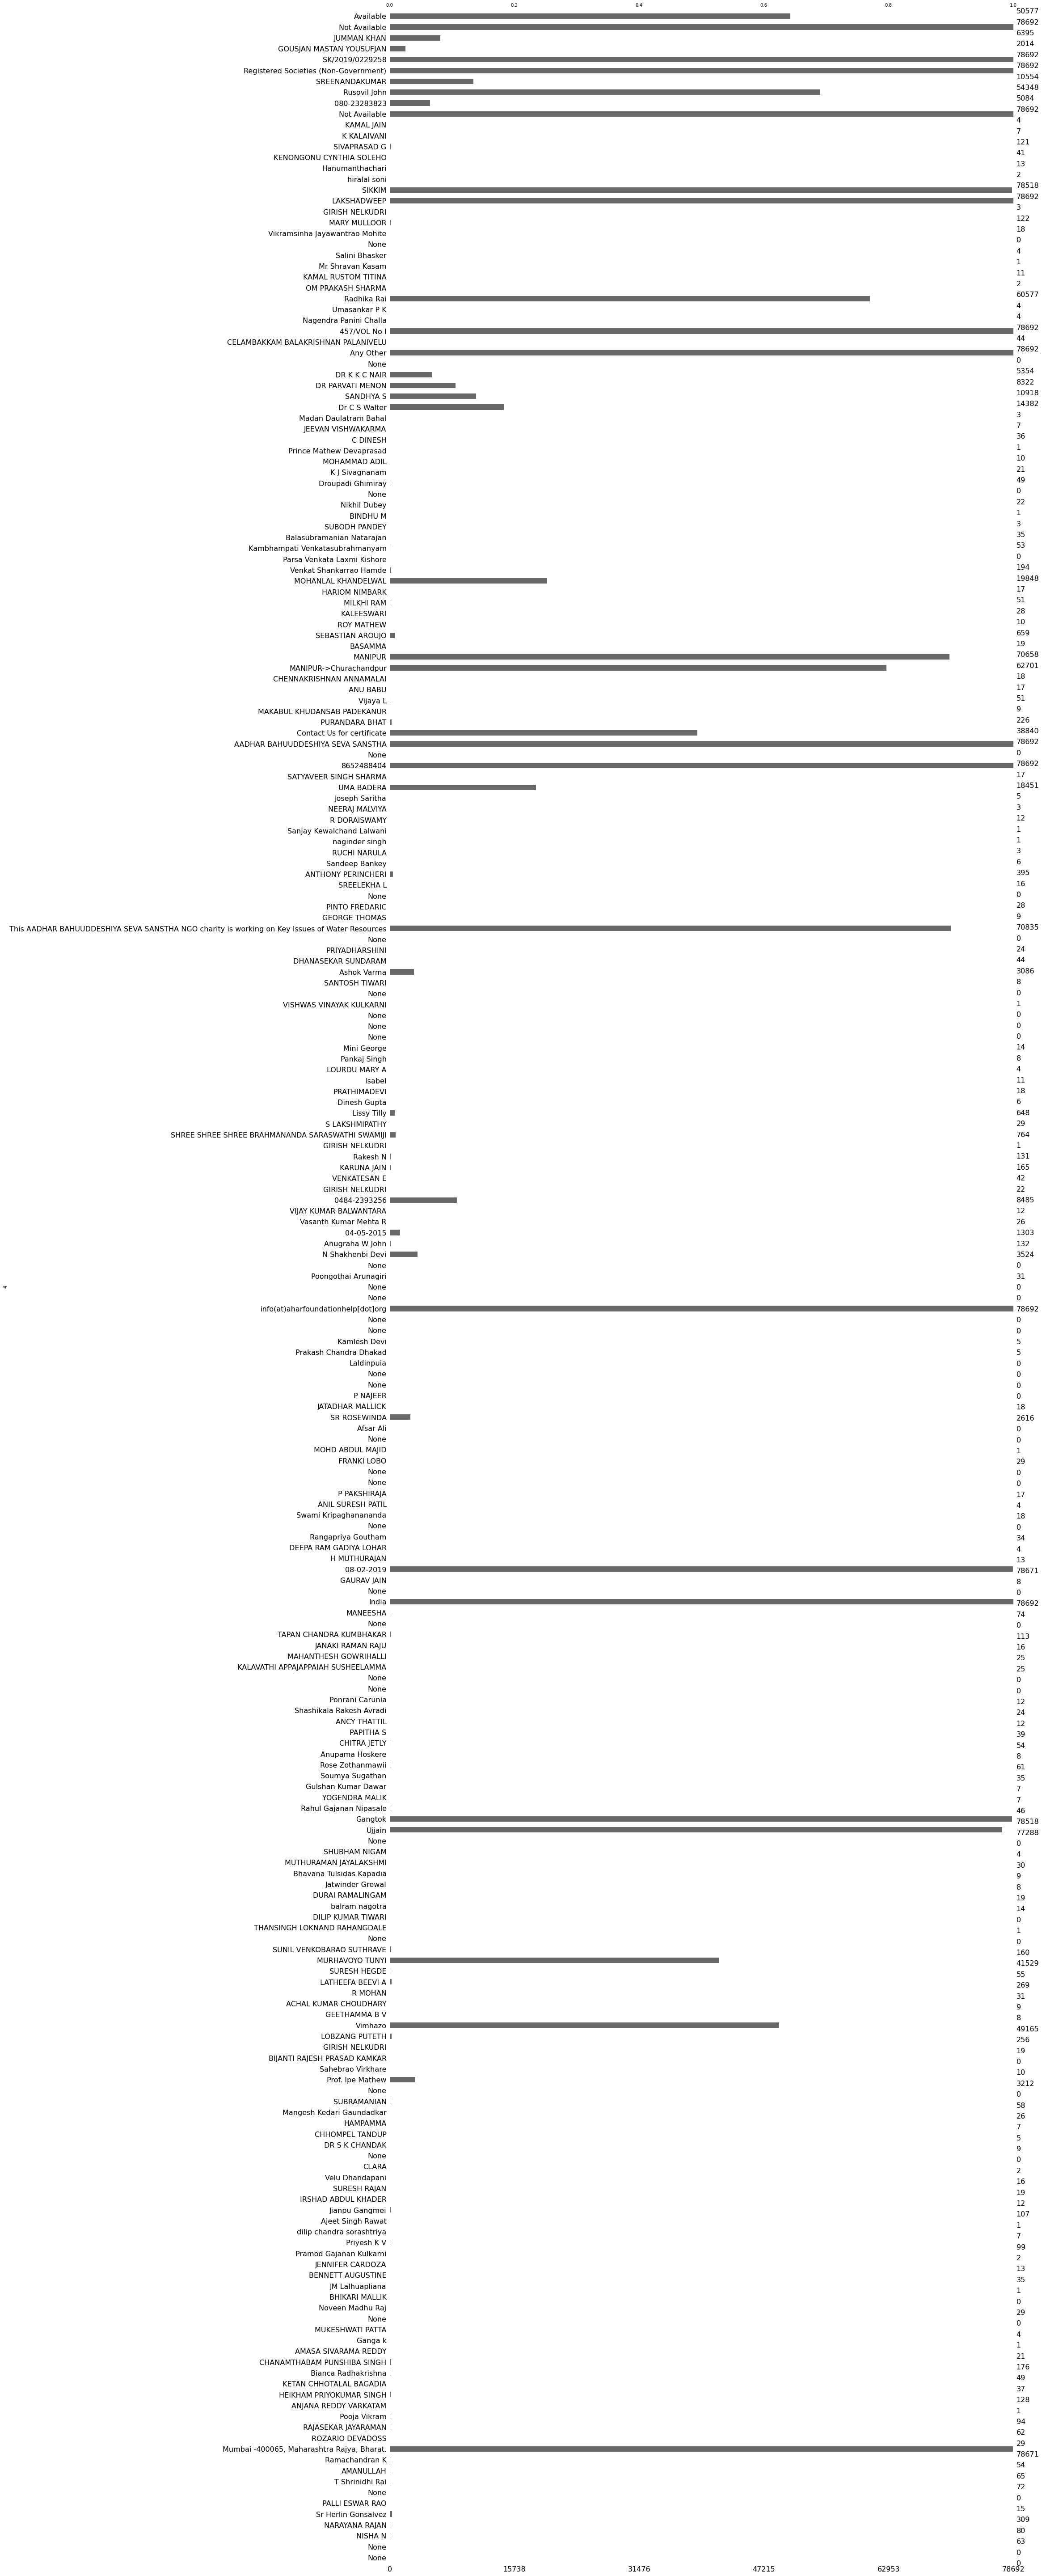

In [82]:
# Visualize the completeness of the dataframe
msno.bar(reg_closed_df)
plt.show()

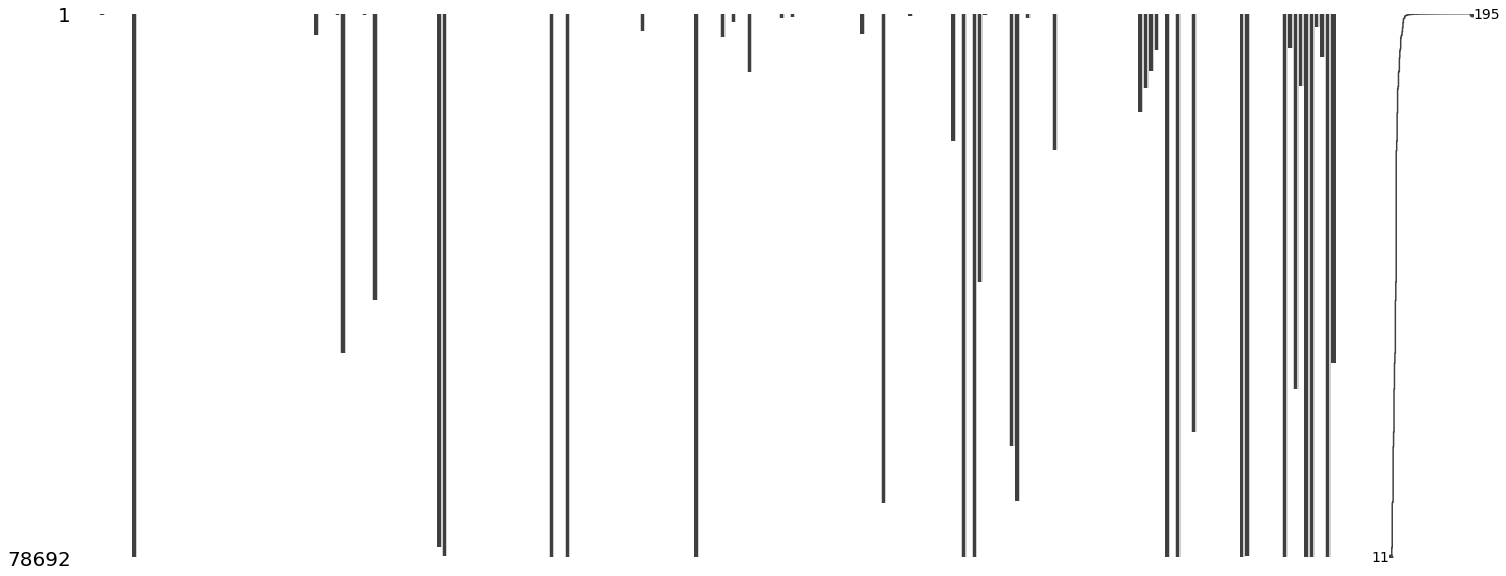

In [83]:
# Visualize the locations of the missing values of the dataset
msno.matrix(reg_closed_df)
plt.show()

# Name of NGO


In [84]:
column = dataset["NGO Name"]
column

0                  Smile Foundation Sikkim
1           Vivek Mission Charitable Trust
2                         Youth Parliament
3                      samaj sudhar samiti
4        AADHAR BAHUUDDESHIYA SEVA SANSTHA
                       ...                
78692              LOK SEWA SANSTHAN GONDA
78693                    LOK SEWA SANSTHAN
78694                    LOK SEWA SANSTHAN
78695             LOK SEWA SANSTHAN SAMITI
78696            LOKKALYANS AMITIBISAL PUR
Name: NGO Name, Length: 78697, dtype: object

In [85]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))
print("No. of unique values:", len(column.unique()))
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of duplicates:", len(duplicates))
table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 73662
No. of duplicates: 3961


,Duplicate Names,Count
0,NGO,29
1,RURAL DEVELOPMENT SOCIETY,17
2,PRAGATI,16
3,PRAYAS,12
4,SAMPARK,11
...,...,...
3956,PASCHIM BANGA JATIYA BAYASKA SHIKSHA PARSAD,2
3957,PEOPLE WELFARE SOCIETY,2
3958,PEOPLES MULTIPURPOSE SERVICE ORGANIZATION,2
3959,PEOPLES EDUCATION AND RIGHTS TRUST,2


In [86]:
dataset[column == table.iloc[0,0]].head()

,,APO,Academic Administrator,Academic Adviser,Accountant,Actor,Actress,Additional Director,Additional Secretary,Additional Treasurer,...,Telephone,Telephone 2,Treasurer,Trustee,Type of NGO,Unique Id of VO/NGO,Vice Chairman,Vice President,Website,frca
16116,None,None,None,None,None,None,None,None,None,None,...,0471-2721133,None,Sudha Mehta,None,Cooperative Society,KL/2009/0015467,None,None,NO website is listed,Nil
18801,None,None,None,None,None,None,None,None,None,None,...,08195-000000,None,SMT CHANDA TIWARI,None,Society,KA/2009/0022122,None,None,NO website is listed,Na
18802,None,None,None,None,None,None,None,None,None,None,...,08192-696842,None,Mamta Pandey,None,Society,KA/2010/0026270,None,None,NO website is listed,NO
18803,None,None,None,None,None,None,None,None,None,None,...,08482-24455,None,Miss Durga,None,Society,KA/2011/0042427,None,None,http://www.nog.india.gov.in,No
19518,None,None,None,None,None,None,None,None,None,None,...,0435-2001538,None,Geeta Parmar,None,Trust Trust,TN/2010/0034954,None,None,NO website is listed,Not Available


# URL of NGO

In [87]:
column = dataset["Website"]
column

0                     Not Available
1              http://vmct.in/vmct/
2        http://youthparliament.in/
3                     Not Available
4                     Not Available
                    ...            
78692          NO website is listed
78693          NO website is listed
78694          NO website is listed
78695          NO website is listed
78696          NO website is listed
Name: Website, Length: 78697, dtype: object

In [88]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate URLs", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 15015
No. of Duplicates: 795


,Duplicate URLs,Count
0,Not Available,31169
1,NO website is listed,30022
2,[email protected],507
3,http://,313
4,http://ngo.india.gov.in,292
...,...,...
790,http://www.hihseed.org,2
791,", www.herbalsiddha.com",2
792,http://www.indotrust.org,2
793,http://kalvitrustindia.org,2


# ID of NGO


In [89]:
column = dataset["Unique Id of VO/NGO"]
column

0        SK/2018/0220160
1        PB/2016/0108881
2        RJ/2018/0184767
3        MH/2018/0220090
4        SK/2019/0229258
              ...       
78692    UP/2011/0043700
78693    UP/2010/0034225
78694    UP/2009/0023649
78695    UP/2009/0012564
78696    UP/2009/0019572
Name: Unique Id of VO/NGO, Length: 78697, dtype: object

In [30]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))
print("No. of unique values:", len(column.unique()))
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of duplicates:", len(duplicates))
table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 78058
No. of duplicates: 627


,Duplicate Names,Count
0,RJ/2018/0213046,6
1,MH/2018/0196672,4
2,MH/2018/0197661,4
3,RJ/2017/0169840,4
4,MH/2017/0168292,3
...,...,...
622,KL/2009/0022137,2
623,KL/2009/0012147,2
624,KL/2015/0087912,2
625,KL/2009/0006361,2


# Type of NGO

In [31]:
column = dataset["Type of NGO"]
column

0        Registered Societies (Non-Government)
1                       Trust (Non-Government)
2                       Trust (Non-Government)
3              Academic Institutions (Private)
4        Registered Societies (Non-Government)
                         ...                  
78692                                  Society
78693                                  Society
78694                                  Society
78695                                  Society
78696                                  Society
Name: Type of NGO, Length: 78697, dtype: object

In [32]:

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))
print("No. of unique values:", len(column.unique()))
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of duplicates:", len(duplicates))
table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 29
No. of duplicates: 22


,Duplicate Names,Count
0,Society,27652
1,Registered Societies (Non-Government),21159
2,Trust (Non-Government),16639
3,Trust,9124
4,Private Sector Companies (Sec 8/25),894
5,Other Registered Entities (Non-Government),782
6,Society Society,707
7,Cooperative Society,615
8,Academic Institutions (Private),371
9,Trust Trust,330


In [33]:
dataset[column == table.iloc[13,0]].head()

,,APO,Academic Administrator,Academic Adviser,Accountant,Actor,Actress,Additional Director,Additional Secretary,Additional Treasurer,...,Telephone,Telephone 2,Treasurer,Trustee,Type of NGO,Unique Id of VO/NGO,Vice Chairman,Vice President,Website,frca
11463,None,None,None,None,None,None,None,None,None,None,...,08223-282093,None,johnasirvatham,None,Trust Trust Trust,KA/2012/0052220,None,None,NO website is listed,Available
16163,None,None,None,None,None,None,None,None,None,None,...,91493-32397,None,SUSHIL CHOUBEY,None,Trust Trust Trust,KL/2014/0074437,None,None,http://www.azharemschool.org,075901108
19467,None,None,None,None,None,None,None,None,None,None,...,0431-2792655,None,pawan tiwari,None,Trust Trust Trust,TN/2014/0077391,None,None,NO website is listed,Not Available
19781,None,None,None,None,None,None,None,None,None,None,...,0416-2290945,None,MAMTA SONI,None,Trust Trust Trust,TN/2013/0057746,None,None,NO website is listed,Not Available
19831,None,None,None,None,None,None,None,None,None,None,...,04364-243334,None,Sharadkumar Baburao Chalikwar,None,Trust Trust Trust,TN/2011/0043752,None,None,NO website is listed,Not Available


# Key issues

In [35]:
column = dataset["Key Issues"]
column

0        This Smile Foundation Sikkim NGO charity is wo...
1        This Vivek Mission Charitable Trust NGO charit...
2        This Youth Parliament NGO charity is working o...
3        This samaj sudhar samiti NGO charity is workin...
4        This AADHAR BAHUUDDESHIYA SEVA SANSTHA NGO cha...
                               ...                        
78692                                                 None
78693                                                 None
78694                                                 None
78695                                                 None
78696                                                 None
Name: Key Issues, Length: 78697, dtype: object

In [36]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))
print("No. of unique values:", len(column.unique()))
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of duplicates:", len(duplicates))
table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 7857
No. of unique values: 70115
No. of duplicates: 683


,Duplicate Names,Count
0,None,7857
1,[email protected] NO website is listed,12
2,[email protected][email protected],7
3,This royal shikshan avam vikas sansthan NGO ch...,6
4,This JAN SHIKSHAN SANSTHAN NGO charity is work...,5
...,...,...
678,This NAVODAYA YUVA KENDRAM NGO charity is work...,2
679,This VAILOPPILLY SAMSKRITI BHAVAN MULTI PURPOS...,2
680,This VINOBANIKE TAN NGO charity is working on ...,2
681,This VENGASSERY MAHILA SAMAJAM NGO charity is ...,2


In [37]:
dataset[column == table.iloc[1,0]].head()

,,APO,Academic Administrator,Academic Adviser,Accountant,Actor,Actress,Additional Director,Additional Secretary,Additional Treasurer,...,Telephone,Telephone 2,Treasurer,Trustee,Type of NGO,Unique Id of VO/NGO,Vice Chairman,Vice President,Website,frca
14778,None,None,None,None,None,None,None,None,None,None,...,080-23236206,None,GIRJESH KUMAR KASAT,None,Society,KA/2009/0001902,None,None,NO website is listed,Available
19970,None,None,None,None,None,None,None,None,None,None,...,0451-2471666,None,Jyoti Prakash Khopkar,None,Trust,TN/2014/0081488,None,None,NO website is listed,Not Available
27118,None,None,None,None,None,None,None,None,None,None,...,Not Available,None,Mohd Rafique Shaikh Alauddin,None,Registered Societies (Non-Government),MP/2017/0159762,None,None,Not Available,Not Available
27218,None,None,None,None,None,None,None,None,None,None,...,0755-3255973,None,VAZIRKHA DILAWARKHA PATHAN,None,Society,MP/2009/0022898,None,None,NO website is listed,Not Available
44041,None,None,None,None,None,None,None,None,None,None,...,07257-219924,None,Khadim Hussain,None,Society,MH/2013/0068893,None,None,NO website is listed,Not Available


In [43]:
raw_final.to_csv("IndiaNGO.csv")

In [103]:
dataset = dataset[['NGO Name', 'Unique Id of VO/NGO', 'President', 'Secretary',
       'Treasurer', 'Registered With', 'Type of NGO',
       'Registration Number', 'City of Registration',
       'State of Registration', 'Date of Registration', 'frca', 'City',
       'State', 'Country', 'Telephone', 'Mobile Number', 'Address',
       'Email', 'Website', 'Key Issues', 'Operational States',
       'Operational Districts', 'Chief Functionary', 'Chairman',
       'Joint Secretary', 'Others', 'Actor',
       'NGO Registration certificate', 'Telephone 2']]
dataset


,NGO Name,Unique Id of VO/NGO,President,Secretary,Treasurer,Registered With,Type of NGO,Registration Number,City of Registration,State of Registration,...,Key Issues,Operational States,Operational Districts,Chief Functionary,Chairman,Joint Secretary,Others,Actor,NGO Registration certificate,Telephone 2
0,Smile Foundation Sikkim,SK/2018/0220160,Sumitra Subba,Reema Subba,Khimoo Lepcha,Any Other,Registered Societies (Non-Government),E21/SAM/2805,Gangtok,SIKKIM,...,This Smile Foundation Sikkim NGO charity is wo...,Not Available,Not Available,Brahm Muni,Sant Ganga Ram,Pushpa Mohan suthar,nikita suresh bhalerao,jitendra asshok shirsate,Contact Us for certificate,9832557651
1,Vivek Mission Charitable Trust,PB/2016/0108881,Parvati Jangid,Ram Tirth,Amarjeet Singh,Registrar of Societies,Trust (Non-Government),082,Bathinda,PUNJAB,...,This Vivek Mission Charitable Trust NGO charit...,PUNJAB,PUNJAB->Bathinda,Indra Narayan Pradhan,Mohan Prakash Pradhan,sameena begam,ASHA SUKAYE,KOLATA NARASIMHA REDDY,Contact Us for certificate,09947421050
2,Youth Parliament,RJ/2018/0184767,Kumar Chhetri,Dr Mohan L Suthar,Hari Das Nepal,Sub-Registrar,Trust (Non-Government),2164,JODHPUR,RAJASTHAN,...,This Youth Parliament NGO charity is working o...,Not Available,Not Available,Vimhazo,Visenuo Avibu John,MAN SINGH RAJPUT,DAISY,MAHANTHESH GOWRIHALLI,Contact Us for certificate,09447387538
3,samaj sudhar samiti,MH/2018/0220090,MUMTAZ KHAN MANSURI,Monorath Nepal,Binita Karki,International Organisation,Academic Institutions (Private),F-3334/77,ujjain,LAKSHADWEEP,...,This samaj sudhar samiti NGO charity is workin...,SIKKIM,SIKKIM->East District,JAYARAMAN K,Shatung Phom,SUNITA GUGNANI,BABY K P,MAHANTHESH GOWRIHALLI,Contact Us for certificate,9745884441
4,AADHAR BAHUUDDESHIYA SEVA SANSTHA,SK/2019/0229258,MOHANLAL KHANDELWAL,Radhika Rai,Rusovil John,Any Other,Registered Societies (Non-Government),457/VOL No I,Gangtok,SIKKIM,...,This AADHAR BAHUUDDESHIYA SEVA SANSTHA NGO cha...,MANIPUR,MANIPUR->Churachandpur,MURHAVOYO TUNYI,Vimhazo,Ashok Varma,SEBASTIAN AROUJO,PALLI ESWAR RAO,Contact Us for certificate,080-23283823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78692,LOK SEWA SANSTHAN GONDA,UP/2011/0043700,None,None,None,Registrar of Societies,Society,".648,",None,None,...,None,None,None,None,None,None,None,None,None,None
78693,LOK SEWA SANSTHAN,UP/2010/0034225,None,None,None,Registrar of Societies,Society,202/1996-96,None,None,...,None,None,None,None,None,None,None,None,None,None
78694,LOK SEWA SANSTHAN,UP/2009/0023649,None,None,None,Registrar of Societies,Society,648,None,None,...,None,None,None,None,None,None,None,None,None,None
78695,LOK SEWA SANSTHAN SAMITI,UP/2009/0012564,None,None,None,Registrar of Societies,Society,837/1996-97,None,None,...,None,None,None,None,None,None,None,None,None,None


In [100]:
dataset.to_csv("Final_IndiaNGO.csv")